In [1]:
from skimage import io
import numpy as np
io.use_plugin('matplotlib')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

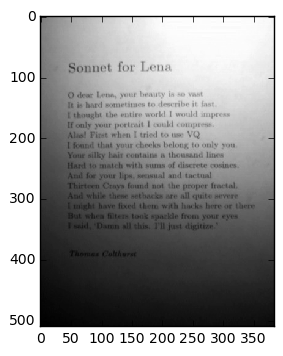

In [2]:
sonet = io.imread('sonet.jpg')
io.imshow(sonet)

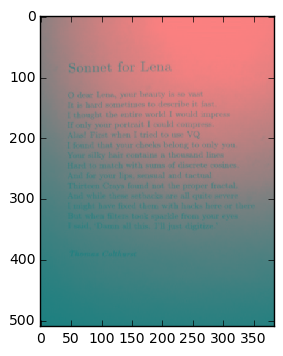

In [3]:
sonet = cv2.cvtColor(cv2.cvtColor(sonet, cv2.COLOR_GRAY2RGB), cv2.COLOR_RGB2YCR_CB)
io.imshow(sonet)

In [18]:
def opt_log(sonet, a, b, sigma):
    img = np.copy(sonet)
    y = img[:, :, 0]
    y_ = cv2.GaussianBlur(y, (a, b), sigmaX=sigma)
    bright_channel = np.log(y * 1.0 / y_)
    bright_channel -= np.min(bright_channel)
    bright_channel = bright_channel * 255 / np.max(bright_channel)
    img[:, :, 0] = bright_channel
    return cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_YCR_CB2RGB), cv2.COLOR_RGB2GRAY)

def opt(sonet, a, b, sigma):
    img = np.copy(sonet)
    y = img[:, :, 0]
    y_ = cv2.GaussianBlur(y, (a, b), sigmaX=sigma)
    bright_channel = y * 1.0 / y_
    bright_channel -= np.min(bright_channel)
    bright_channel = bright_channel * 255 / np.max(bright_channel)
    img[:, :, 0] = bright_channel
    return cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_YCR_CB2RGB), cv2.COLOR_RGB2GRAY)

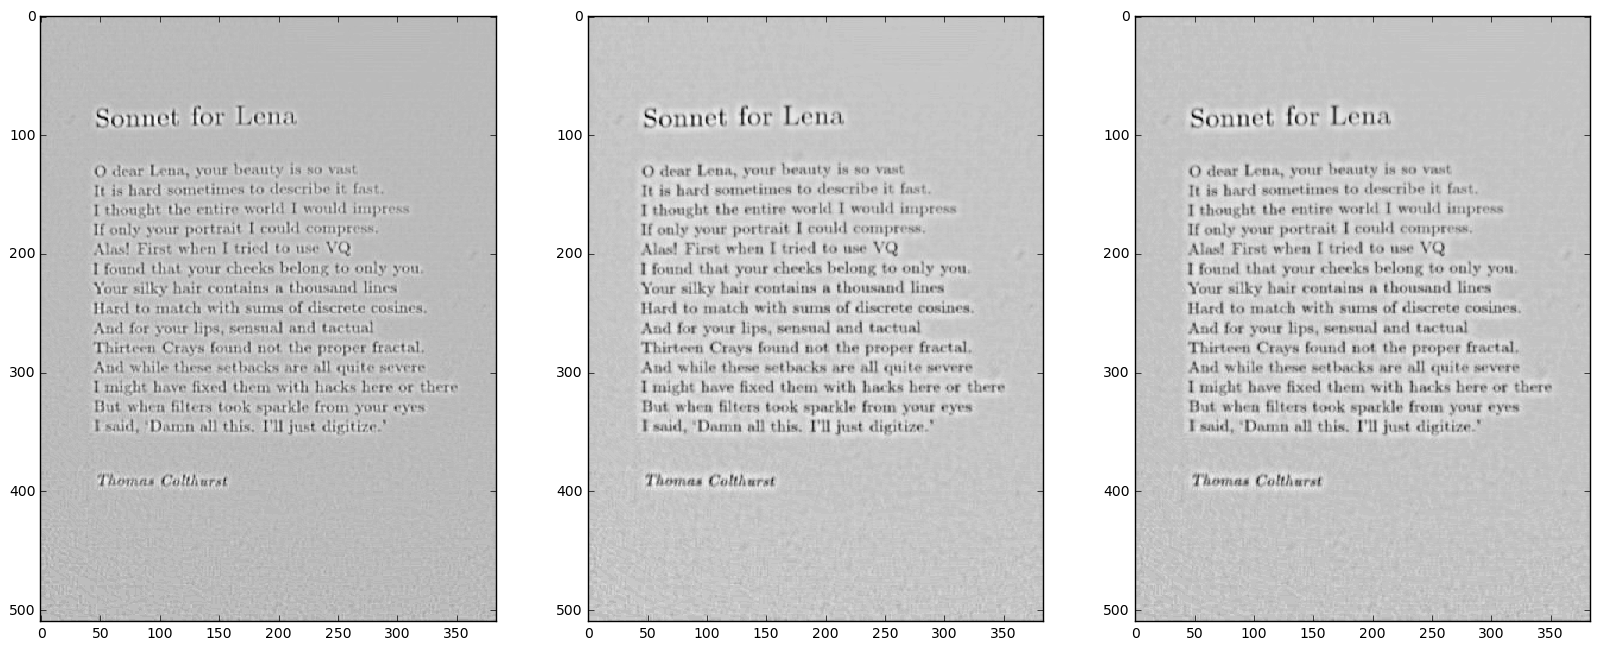

In [17]:
plt.figure(figsize=(20, 20))
for i in range(3) :
    plt.subplot(1, 3, i + 1)
    io.imshow(opt_log(sonet, 13, 13, 10 * i))

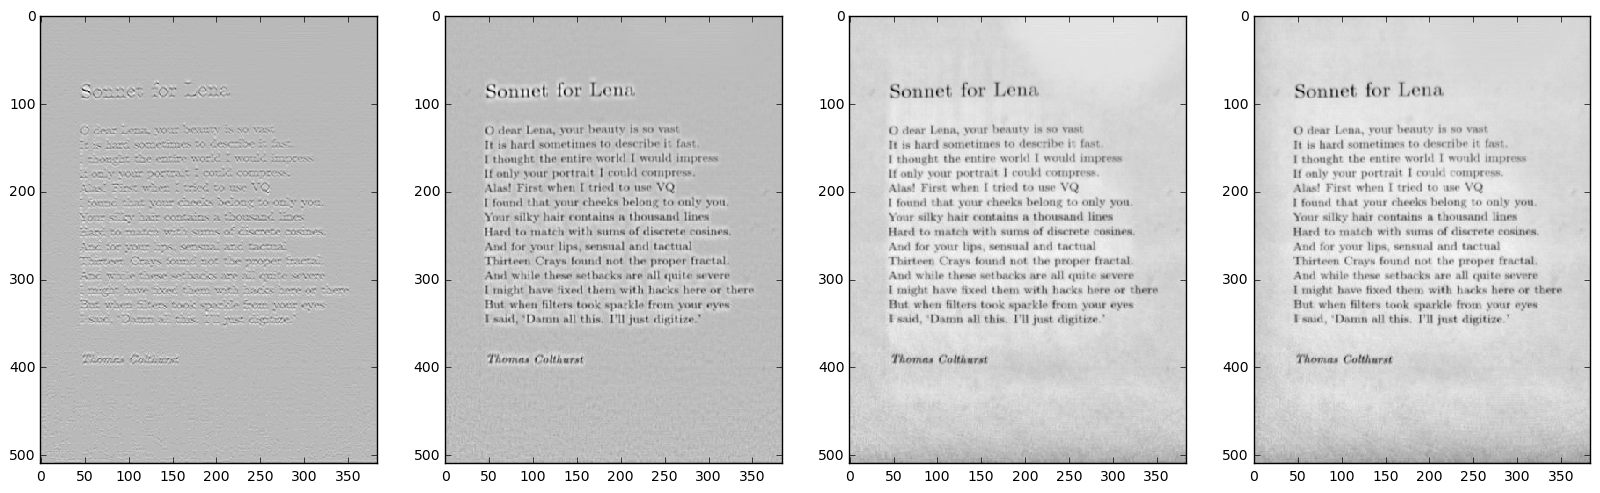

In [19]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
io.imshow(opt_log(sonet, 1, 5, 100))
plt.subplot(1, 4, 2)
io.imshow(opt_log(sonet, 7, 13, 100))
plt.subplot(1, 4, 3)
io.imshow(opt_log(sonet, 11, 97, 100))
plt.subplot(1, 4, 4)
io.imshow(opt_log(sonet, 55, 111, 100))

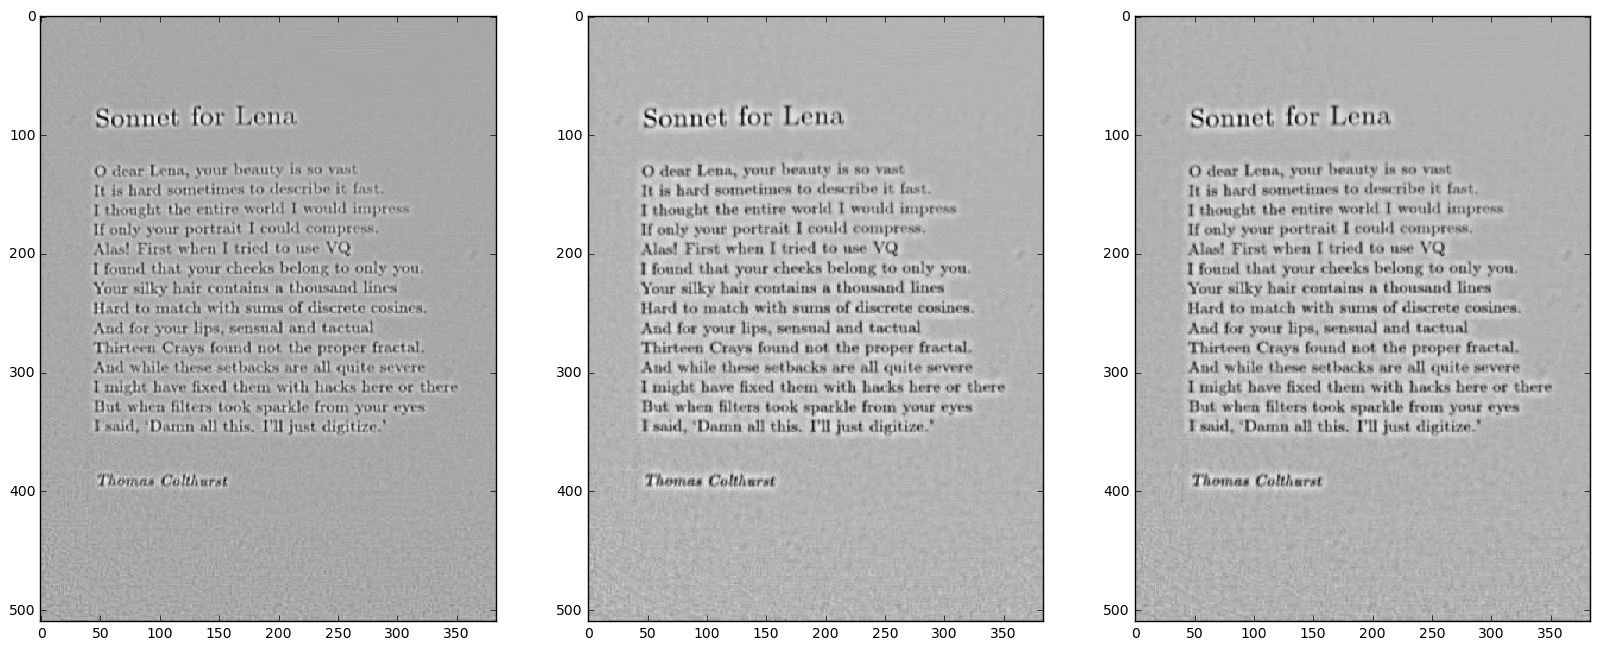

In [20]:
plt.figure(figsize=(20, 20))
for i in range(3) :
    plt.subplot(1, 3, i + 1)
    io.imshow(opt(sonet, 13, 13, 10 * i))

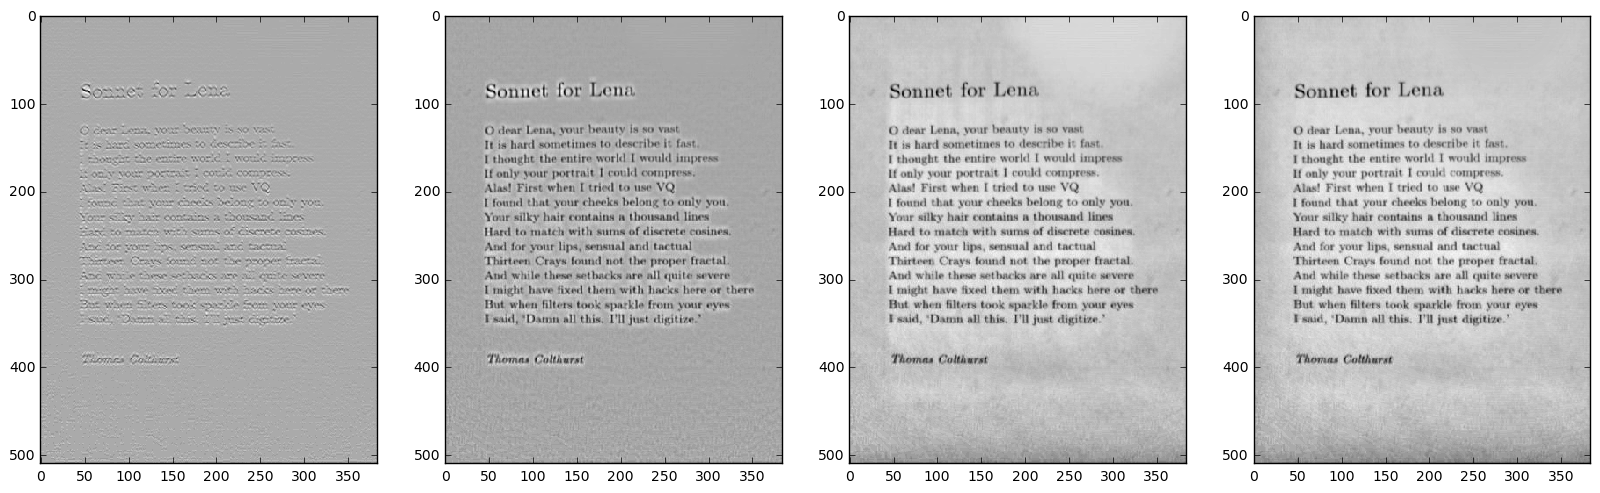

In [21]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
io.imshow(opt(sonet, 1, 5, 100))
plt.subplot(1, 4, 2)
io.imshow(opt(sonet, 7, 13, 100))
plt.subplot(1, 4, 3)
io.imshow(opt(sonet, 11, 97, 100))
plt.subplot(1, 4, 4)
io.imshow(opt(sonet, 55, 111, 100))

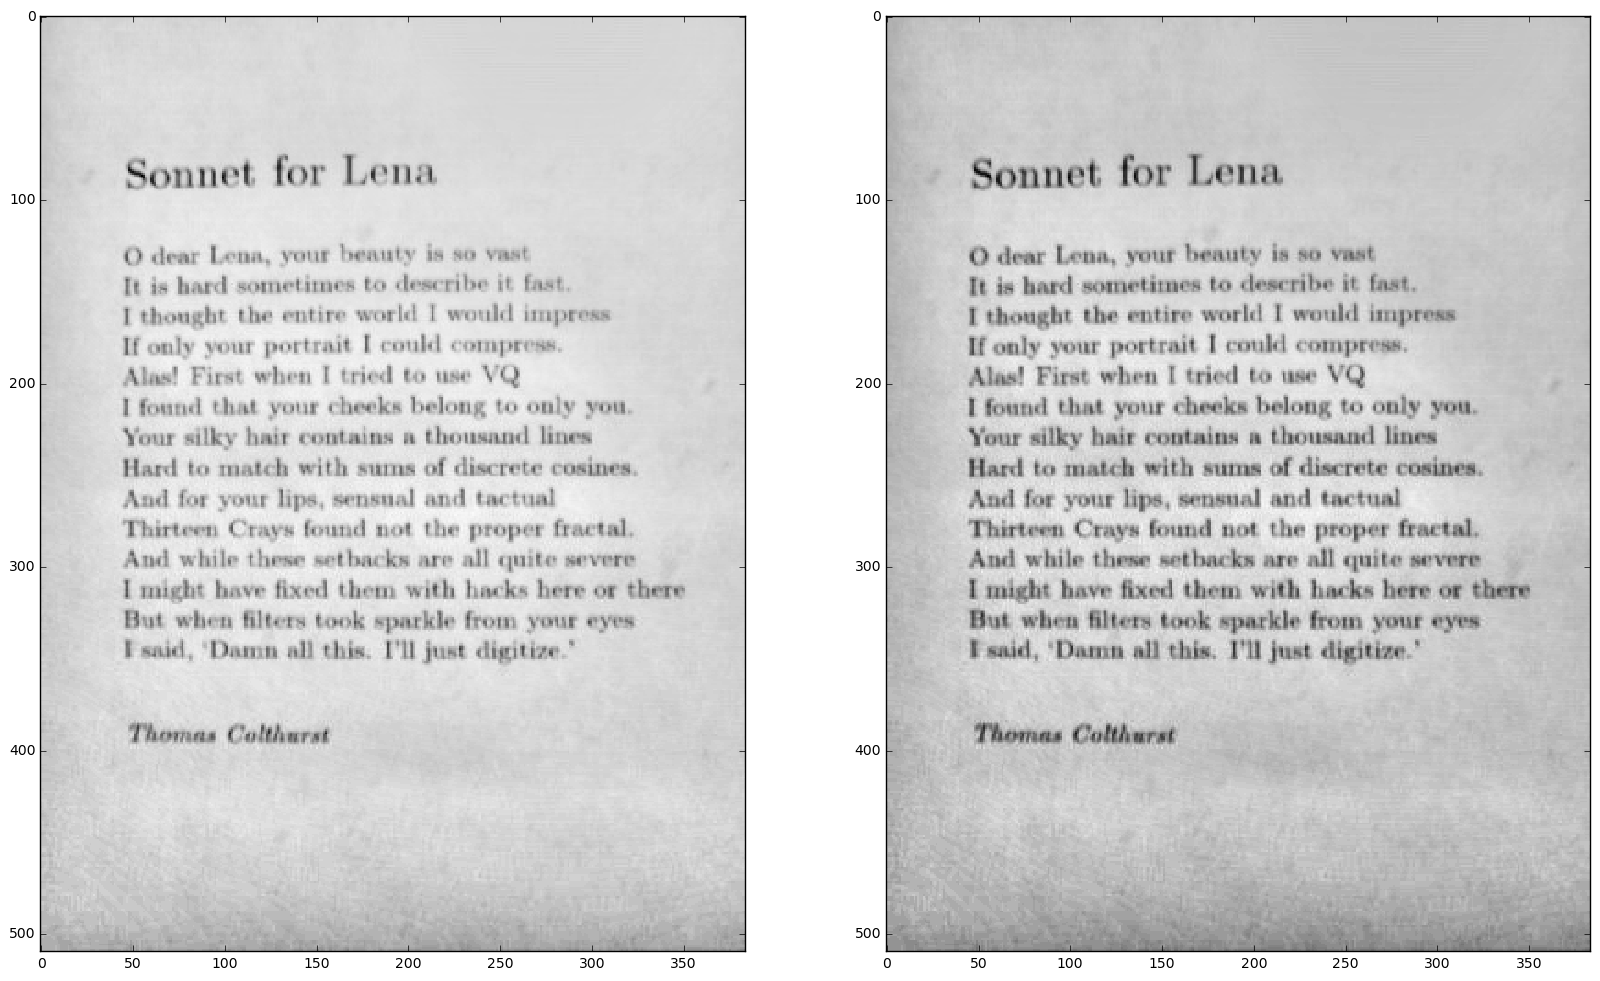

In [26]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
io.imshow(opt_log(sonet, 55, 111, 1000))
plt.subplot(1, 2, 2)
io.imshow(opt(sonet, 55, 111, 100))

Видно, что изображение с использованием логарифмирования заметно улучшает качество изображения. Возможно, это связано с особенностью человеческого глаза. В любом случае, при использовании логарифма картинка не имеет резких перепадов в яркости. 